# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset saya di peroleh dari scarping saat submission sebelumny


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import shutil

from google.colab import files

%matplotlib inline
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
uploaded = files.upload()
uploaded

Saving spiderman_youtube_review.csv to spiderman_youtube_review.csv


{'spiderman_youtube_review.csv': b'videoId,author,text,likeCount,publishedAt,sentiment\nRu8ZahJ9BUE,@JoelCraike,My favourite movie ever,0,2025-09-12T02:57:49Z,\nRu8ZahJ9BUE,@deadartist8827,It was Jurassic Park 3.,0,2025-09-03T19:12:16Z,\nRu8ZahJ9BUE,@CarlosManuelCadena,"My brother is the guy who kept commenting \xe2\x80\x9cAttempt to get Jeremy to review Sam Raimi\xe2\x80\x99s Spider-Man number #\xe2\x80\x9d. I remember when this video dropped, he felt so happy for the shoutout \xf0\x9f\x98\x82",0,2025-04-18T21:53:29Z,\nRu8ZahJ9BUE,@cometark42,My nine year old self squealed in delight after seeing that original trailer on the big screen,0,2025-04-11T15:41:14Z,\nRu8ZahJ9BUE,@TheAwesomeDarkNinja,12:07,0,2024-10-16T15:14:09Z,\nRu8ZahJ9BUE,@abhishekkaswa0_0,That upside down kiss tho \xf0\x9f\x98\x8f,0,2024-08-27T14:38:06Z,\nRu8ZahJ9BUE,@A9h-c,"He speaks insanely fast, I make the video on 0.5 speed to be able to learn English form his videos, but stunning channel",0,2024-08-19T06:42:25Z,\nR

In [4]:
# Simpan dataset mentah ke folder raw
filename = list(uploaded.keys())[0]
print("Nama file:", filename)

os.makedirs("spiderman_youtube_review_raw", exist_ok=True)

raw_path = "spiderman_youtube_review_raw/spiderman_youtube_review_raw.csv"
shutil.copy(filename, raw_path)

print("File disimpan sebagai:", raw_path)

Nama file: spiderman_youtube_review.csv
File disimpan sebagai: spiderman_youtube_review_raw/spiderman_youtube_review_raw.csv


In [5]:
df = pd.read_csv(raw_path)
df.head()

,videoId,author,text,likeCount,publishedAt,sentiment
0,Ru8ZahJ9BUE,@JoelCraike,My favourite movie ever,0,2025-09-12T02:57:49Z,NaN
1,Ru8ZahJ9BUE,@deadartist8827,It was Jurassic Park 3.,0,2025-09-03T19:12:16Z,NaN
2,Ru8ZahJ9BUE,@CarlosManuelCadena,My brother is the guy who kept commenting “Att...,0,2025-04-18T21:53:29Z,NaN
3,Ru8ZahJ9BUE,@cometark42,My nine year old self squealed in delight afte...,0,2025-04-11T15:41:14Z,NaN
4,Ru8ZahJ9BUE,@TheAwesomeDarkNinja,12:07,0,2024-10-16T15:14:09Z,NaN


In [6]:
df.shape

(15026, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15026 entries, 0 to 15025
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   videoId      15026 non-null  object 
 1   author       15014 non-null  object 
 2   text         15026 non-null  object 
 3   likeCount    15026 non-null  int64  
 4   publishedAt  15026 non-null  object 
 5   sentiment    0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 704.5+ KB


In [8]:
df.columns

Index(['videoId', 'author', 'text', 'likeCount', 'publishedAt', 'sentiment'], dtype='object')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [10]:
TEXT_COL = "text"
LABEL_COL = "sentiment"

TEXT_COL, LABEL_COL

('text', 'sentiment')

In [12]:
# Cek apakah kolom sentiment ada dan kosong semua
if LABEL_COL not in df.columns or df[LABEL_COL].isna().all():
    print("[INFO] Kolom 'sentiment' kosong. Membuat label sentimen dari 'likeCount'...")

    if "likeCount" not in df.columns:
        raise ValueError("Kolom 'likeCount' tidak ada di dataset. Tidak bisa membuat label otomatis.")

    def create_sentiment_from_like(x):
        try:
            x = int(x)
        except Exception:
            x = 0
        if x > 0:
            return "positive"
        else:
            return "negative"

    df[LABEL_COL] = df["likeCount"].apply(create_sentiment_from_like)

else:
    print("[INFO] Kolom 'sentiment' sudah terisi. Menggunakan label asli.")

df[[TEXT_COL, LABEL_COL]].head()

[INFO] Kolom 'sentiment' sudah terisi. Menggunakan label asli.


,text,sentiment
0,My favourite movie ever,negative
1,It was Jurassic Park 3.,negative
2,My brother is the guy who kept commenting “Att...,negative
3,My nine year old self squealed in delight afte...,negative
4,12:07,negative


In [13]:
df.isna().sum()

,0
videoId,0
author,12
text,0
likeCount,0
publishedAt,0
sentiment,0


In [14]:
df.duplicated().sum()

np.int64(1)

In [15]:
df.duplicated(subset=[TEXT_COL]).sum()

np.int64(167)

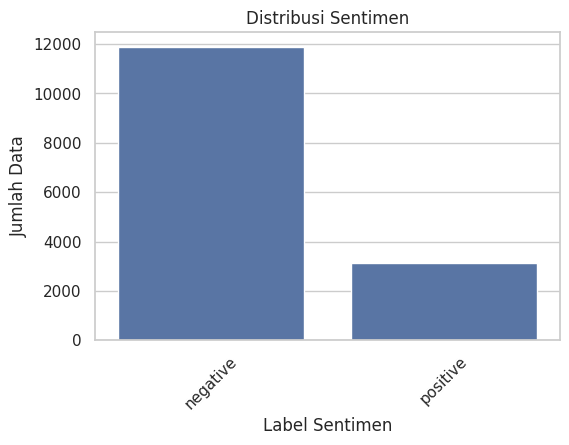

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=LABEL_COL)
plt.title("Distribusi Sentimen")
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Data")
plt.xticks(rotation=45)
plt.show()

In [17]:
df["text_length"] = df[TEXT_COL].astype(str).str.len()
df["text_length"].describe()

,text_length
count,15026.000000
mean,118.669240
std,213.408969
min,1.000000
25%,35.000000
50%,63.000000
75%,124.000000
max,8325.000000


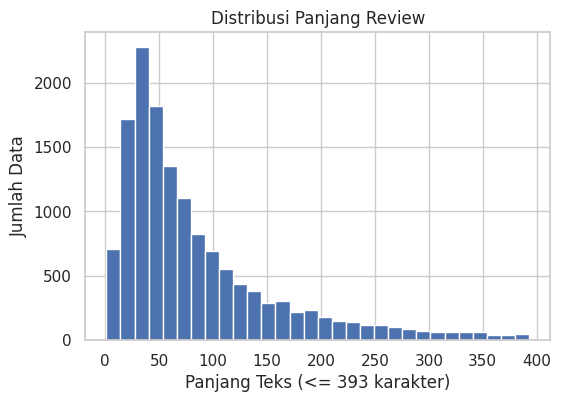

In [18]:
q95 = df["text_length"].quantile(0.95)

plt.figure(figsize=(6, 4))
plt.hist(df.loc[df["text_length"] <= q95, "text_length"], bins=30)
plt.xlabel(f"Panjang Teks (<= {int(q95)} karakter)")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Panjang Review")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
df = df.dropna(subset=[TEXT_COL, LABEL_COL])

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(15025, 7)

In [22]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"#\w+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_review"] = df[TEXT_COL].astype(str).apply(clean_text)

df[[TEXT_COL, "clean_review"]].head()

,text,clean_review
0,My favourite movie ever,my favourite movie ever
1,It was Jurassic Park 3.,it was jurassic park
2,My brother is the guy who kept commenting “Att...,my brother is the guy who kept commenting atte...
3,My nine year old self squealed in delight afte...,my nine year old self squealed in delight afte...
4,12:07,


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["sentiment_label"] = le.fit_transform(df[LABEL_COL])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping

{'negative': np.int64(0), 'positive': np.int64(1)}

In [24]:
final_df = df[["clean_review", "sentiment_label"]]
final_df.head()

,clean_review,sentiment_label
0,my favourite movie ever,0
1,it was jurassic park,0
2,my brother is the guy who kept commenting atte...,0
3,my nine year old self squealed in delight afte...,0
4,,0


In [25]:
os.makedirs("preprocessing/spiderman_youtube_review_preprocessing", exist_ok=True)

preprocessed_path = "preprocessing/spiderman_youtube_review_preprocessing/spiderman_youtube_review_preprocessed.csv"
final_df.to_csv(preprocessed_path, index=False)

print("File hasil preprocessing disimpan di:", preprocessed_path)

File hasil preprocessing disimpan di: preprocessing/spiderman_youtube_review_preprocessing/spiderman_youtube_review_preprocessed.csv


In [26]:
final_df.to_csv(
    "spiderman_youtube_review_preprocessing.csv",
    index=False
)

In [34]:
!ls

sample_data		       spiderman_youtube_review_preprocessing.csv
spiderman_youtube_review..csv


In [28]:
# 1) Kompres folder raw jadi ZIP
!zip -r spiderman_youtube_review_raw.zip spiderman_youtube_review_raw
# 2) Download ZIP-nya ke laptop
from google.colab import files
files.download("spiderman_youtube_review_raw.zip")

  adding: spiderman_youtube_review_raw/ (stored 0%)
  adding: spiderman_youtube_review_raw/spiderman_youtube_review_raw.csv (deflated 62%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>